# The Malthusian Growth Model

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [9]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Description of the Malthusian Model

The Malthusian Growth Model is a model of population growth. The concepts of the model was first proposed in 1798 by Robert Thomas Malthus, an English economist. The overall idea is that technological advances alone will not improve a population's well-being in the long run, because it caused the population growth, and the income per capita thus falls back to its initial level. This mechanism explains the stagnation so for - but not too long after, the assumptions of the Malthusian model seemed to fail as the industrial revolution led to an extreme growth in income per capita. In this model project, we attempt to illustrate how population and income per capita responds and adapts to changes to the technology and population (for different model assumptions?).

We consider a model where time is discrete, t=0,1,2,...,$\infty$. The economy is closed meaning that total production is equal to total income. There are three main assumptions to the Malthusain model. The first assumption is that labour is subject to diminishing marginal returns in production, which is represented in the model as the Cobb-Douglas production function:

$Y_t=L_t^{1-\alpha}(AX)^\alpha, 0 < \alpha < 1$,

where t denotes time, t=0,1,2.., $Y_t$ denotes output, A is the level of techonology, $L_t$ is labor input and X is land (fixed factor of production). Output per worker can we written as:

$y_t=(\frac{AX}{L_t})^\alpha$

This equation shows that output per worker declines as labor (L) increases due to the assumption of diminishing returns, given that AX is constant. In our model we will assume that the level of technology (A) changes in form of arbitrarily timed discrete shocks (representing new innovations being made) and land (X) is constant. The assumption of A having a more smooth growth constant will be discussed later (måske?).

The next main assumption of the Malthusian model is that the birth rate in the economy increases with income per capita, which is shown in this equation:

$n_t=\eta y_t$,

where $\eta$ is a positive parameter. This equation implies that every person in the economy gets $n_t$ children in each period. We further assume that the preferable number of children increases with income per capita. With this assumption it would be reasonable to think of $\eta$ as a parameter below one, where each parent in the economy uses a fixed fraction of their income to provide for their children (food, clothes, etc.). We can thus interpret $\eta$ as a parameter capturing preferences for family size and cost of child rearing etc.

For simplicity, we assume that everyone in the economy works, meaning no unemployment. We then assume that the labor force ($L_t$) evolves as follows:

$L_{t+1}=n_tL_t+(1-\mu)L_t, L_0$ given.

This equations implies that the labor force in the next period ($L_{t+1}$) is equal to the current labor force ($L_t$) times births per person ($n_t$), plus the part of the current labor force, which is still in the labor force (the fraction $(1-\mu)$). Assuming that people work intil they die, we can think of $\mu$ as the mortality rate, where a higher $\mu$ means higher mortality.

By inserting $y_t$ into $n_t$ and inserting that into the labour force equation we get: 

$L_{t+1}=\eta(AX/L_t)^\alpha L_t+(1-\mu)L_t \Leftrightarrow L_{t+1}=\eta L^{1-\alpha}(AX)^\alpha+(1-\mu)L_t$, $L_0$ given.

We would like to investigate the steady state values, and to do that we introduce the definion: 

$L_{t+1}=L_t=L^*$

This means that we can turn the labor force equation into: 

$L^*=\eta (L^*)^{1-\alpha}(AX)^\alpha+(1-\mu)L^* \Leftrightarrow L^*=\left(\frac{\eta}{\mu}\right)^{1/\alpha}AX$

tekst tekst tekst

$y_t=(AX/L_t)^\alpha \Leftrightarrow y^*=(AX/L^*)^\alpha$ 

Now inserting $L^*$ into $y^*$:

$y^*=\left[\left(\frac{\eta}{\mu}\right)^{-1/\alpha}\right]^\alpha=\frac{\mu}{\eta}$


We are looking to simulate the steady state value of the labor force, $L^*$. Furthermore, we are simulating a shock to the technology curve, A, in order to see how that affects the output per worker and the labor force.

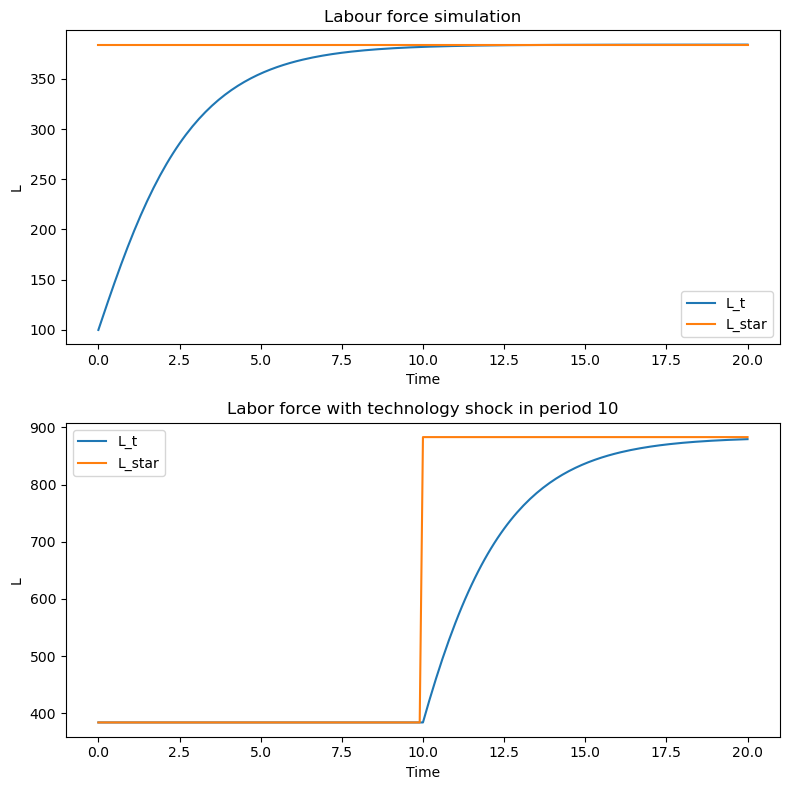

In [14]:
# define the values of the model
alpha = 0.5
eta = 0.8
mu = 0.1
L_0 = 100
L_t = L_0
A = 2
X = 3

# define L_t and L^* for the simulation
t_values = [0]
L_t_values = [L_t]
L_star_values = [((eta / mu) ** (1/alpha)) * A * X]

# define simulation time parametres
T = 20
dt = 0.1

# loop over time steps and calculate the equations of the model
for t in range(1, int(T/dt) + 1):
    Y_t = L_t**(1-alpha)*(A*X)**alpha
    y_t = (A*X/L_t)**alpha
    n_t = eta*y_t
    L_t1 = n_t*L_t + (1-mu)*L_t
    L_t = L_t1
    L_star = ((eta / mu) ** (1/alpha)) * A * X
    #append time and labor force values to lists
    t_values.append(t*dt)
    L_t_values.append(L_t)
    L_star_values.append(L_star)

# repeat the process, but now including a positive shock in A
t_values_shock = [0]
L_t_values_shock = [L_t]
L_star_values_shock = [((eta / mu) ** (1/alpha)) * A * X]

for t in range(1, int(T/dt) + 1):
    Y_t = L_t**(1-alpha)*(A*X)**alpha
    y_t = (A*X/L_t)**alpha
    n_t = eta*y_t
    if t == 100:
        A = 2.3 * A  # shock in parameter A
    L_t1 = n_t*L_t + (1-mu)*L_t
    L_t = L_t1
    L_star = ((eta / mu) ** (1/alpha)) * A * X
    t_values_shock.append(t*dt)
    L_t_values_shock.append(L_t)
    L_star_values_shock.append(L_star)

# plot labor force simulation and steady state value
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].plot(t_values, L_t_values, label='L_t')
axs[0].plot(t_values, L_star_values, label='L_star')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('L')
axs[0].set_title('Labour force simulation')
axs[0].legend()

# plot with a positive shock in A
axs[1].plot(t_values_shock, L_t_values_shock, label='L_t')
axs[1].plot(t_values_shock, L_star_values_shock, label='L_star')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('L')
axs[1].set_title('Labor force with technology shock in period 10')
axs[1].legend()

plt.tight_layout()
plt.show()

The upper plot shows the adaption of the labor force to the steady state value in the economy. The bottom plot visualizes the adaption to steady state when a positive shock to the technology curve occurs in period 10. This shows, that a positive shock to the technology curve will cause the steady state value of the labour force to shift to a higher level.

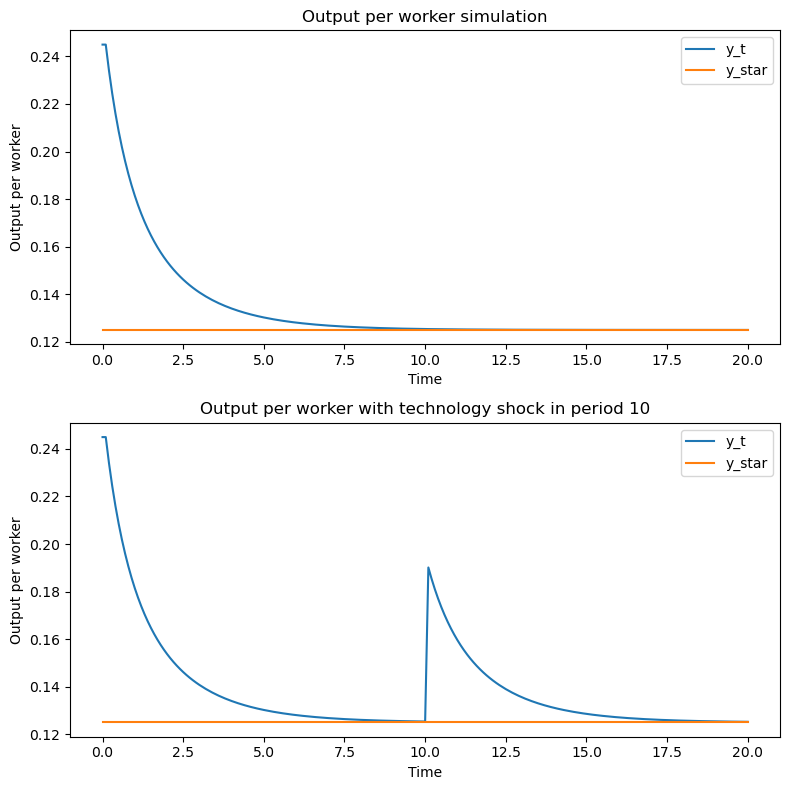

In [15]:
# plot output per worker simulation and state state value
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].plot(t_values, y_t_values, label='y_t')
axs[0].plot(t_values, y_star_values, label='y_star')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Output per worker')
axs[0].set_title('Output per worker simulation')
axs[0].legend()

# plot output per worker simulation and state state value with a positive shock to the technology curve
axs[1].plot(t_values_shock, y_t_values_shock, label='y_t')
axs[1].plot(t_values_shock, y_star_values_shock, label='y_star')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Output per worker')
axs[1].set_title('Output per worker with technology shock in period 10')
axs[1].legend()

plt.tight_layout()
plt.show()

These plots show the adaptions to the steady state level for output per worker. When a positive shift in the technology curve occurs, the output per worker will increase in the short run, as shown in the bottom plot. Then on the long run the output per worker will converge back to the old steady state value. As we saw in the previous plot the labor force will adjust to a new and higher level in the long run. As the the population grows, more resources such as food, clothes and so on will be used, and thus they will 'eat up' the excess income per worker until the previous steady state level is reached again. 

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 